In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
%matplotlib inline

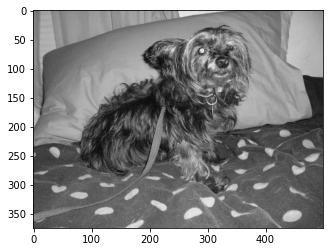

In [3]:
data_dir = 'D:/code/learning/Machine_Learning/machine_learning/deep_learning_py_tf_keras/02-cats_n_dogs/kagglecatsanddogs_3367a/PetImages'
categories = ['Dog', 'Cat'] 

for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        break
    break

In [4]:
print(img_array)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


In [5]:
print(img_array.shape)

(375, 500)


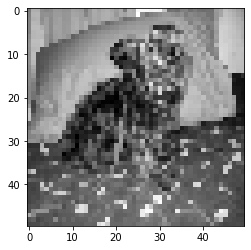

In [6]:
img_size = 50 # 50x50 pixels

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='gray')

In [7]:
training_data = []

def create_training_data():
    for category in categories:  # do dogs and cats

        path = os.path.join(data_dir,category)  # create path to dogs and cats
        class_num = categories.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (img_size, img_size))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                print(e)
                pass

create_training_data()

OpenCV(4.3.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.3.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.3.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.3.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.3.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.3.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.3.0) C:\projects\opencv-python\opencv\modules\imgproc\s

In [8]:
print(len(training_data))

24946


In [9]:
import random

random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
0
1
0
0
0
1
0


In [11]:
X = []
y = []

In [12]:
for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, img_size, img_size, 1))

X = np.array(X).reshape(-1, img_size, img_size, 1) # change 1 to 3 values for RGB

y = np.array(y)

[[[[232]
   [234]
   [ 80]
   ...
   [158]
   [136]
   [131]]

  [[210]
   [208]
   [232]
   ...
   [162]
   [132]
   [125]]

  [[209]
   [210]
   [145]
   ...
   [151]
   [131]
   [121]]

  ...

  [[179]
   [173]
   [187]
   ...
   [ 92]
   [ 44]
   [ 83]]

  [[188]
   [186]
   [183]
   ...
   [ 61]
   [ 55]
   [ 71]]

  [[188]
   [170]
   [172]
   ...
   [ 88]
   [ 82]
   [ 94]]]]


In [13]:
import pickle

with open('X.pickle', 'wb') as out:
    pickle.dump(X, out)

with open('y.pickle', 'wb') as out:
    pickle.dump(y, out)

In [14]:
with open('X.pickle', 'rb') as fp:
    X = pickle.load(fp)
    
with open('y.pickle', 'rb') as fp:
    y = pickle.load(fp)

In [15]:
X[1]

array([[[73],
        [87],
        [88],
        ...,
        [55],
        [47],
        [40]],

       [[76],
        [91],
        [85],
        ...,
        [ 1],
        [ 1],
        [ 2]],

       [[78],
        [78],
        [31],
        ...,
        [42],
        [37],
        [35]],

       ...,

       [[59],
        [50],
        [52],
        ...,
        [29],
        [51],
        [57]],

       [[65],
        [60],
        [58],
        ...,
        [29],
        [38],
        [46]],

       [[63],
        [59],
        [62],
        ...,
        [23],
        [34],
        [41]]], dtype=uint8)